In [1]:
# Unzip the uploaded data into Google Drive
#!unzip "drive/MyDrive/ISL/archive.zip" -d "drive/MyDrive/ISL/"

In [3]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.7.0
TF Hub version: 0.12.0
GPU not available :(


## Creating labels.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import os

path_str = r"C:\Users\ayush\Desktop\ISL\Indian"
foldernames = os.listdir(path_str)
foldernames

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [16]:
labels_df = pd.DataFrame(columns=["filename", "label"])

In [17]:
labels_df

,filename,label


In [18]:
filenames = {}

for folder in foldernames:
  filenames[folder] = os.listdir(path_str+"/"+folder)
  filenames[folder] = filenames[folder][:1200]
  print(f"{folder} - {len(filenames[folder])}")

1 - 1200
2 - 1200
3 - 1200
4 - 1200
5 - 1200
6 - 1200
7 - 1200
8 - 1200
9 - 1200
A - 1200
B - 1200
C - 1200
D - 1200
E - 1200
F - 1200
G - 1200
H - 1200
I - 1200
J - 1200
K - 1200
L - 1200
M - 1200
N - 1200
O - 1200
P - 1200
Q - 1200
R - 1200
S - 1200
T - 1200
U - 1200
V - 1200
W - 1200
X - 1200
Y - 1200
Z - 1200


In [19]:
filenames['A'][:10]

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '1001.jpg',
 '1002.jpg',
 '1003.jpg',
 '1004.jpg',
 '1005.jpg']

In [20]:
from IPython.display import Image

In [58]:
filename = []

for folder in foldernames:
  for fname in filenames[folder]:
    filename.append(path_str+'\\'+folder+'\\'+fname)

filename[:10] 

['C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\0.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\1.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\10.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\100.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\1000.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\1001.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\1002.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\1003.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\1004.jpg',
 'C:\\Users\\ayush\\Desktop\\ISL\\Indian\\1\\1005.jpg']

In [59]:
len(filename)

42000

In [60]:
42000/35

1200.0

Hence there are total 35 labels 

In [61]:
labels = []

for folder in foldernames: 
  for i in range (1200):
    labels.append(folder)

len(labels)

42000

In [62]:
labels_df["filename"] = filename
labels_df["label"] = labels

labels_df

,filename,label
0,C:\Users\ayush\Desktop\ISL\Indian\1\0.jpg,1
1,C:\Users\ayush\Desktop\ISL\Indian\1\1.jpg,1
2,C:\Users\ayush\Desktop\ISL\Indian\1\10.jpg,1
3,C:\Users\ayush\Desktop\ISL\Indian\1\100.jpg,1
4,C:\Users\ayush\Desktop\ISL\Indian\1\1000.jpg,1
...,...,...
41995,C:\Users\ayush\Desktop\ISL\Indian\Z\995.jpg,Z
41996,C:\Users\ayush\Desktop\ISL\Indian\Z\996.jpg,Z
41997,C:\Users\ayush\Desktop\ISL\Indian\Z\997.jpg,Z
41998,C:\Users\ayush\Desktop\ISL\Indian\Z\998.jpg,Z


In [63]:
df = labels_df.sample(frac=1)

In [64]:
df

,filename,label
5714,C:\Users\ayush\Desktop\ISL\Indian\5\741.jpg,5
8639,C:\Users\ayush\Desktop\ISL\Indian\8\133.jpg,8
21188,C:\Users\ayush\Desktop\ISL\Indian\I\467.jpg,I
3135,C:\Users\ayush\Desktop\ISL\Indian\3\580.jpg,3
31998,C:\Users\ayush\Desktop\ISL\Indian\R\637.jpg,R
...,...,...
2922,C:\Users\ayush\Desktop\ISL\Indian\3\389.jpg,3
7748,C:\Users\ayush\Desktop\ISL\Indian\7\411.jpg,7
3581,C:\Users\ayush\Desktop\ISL\Indian\3\982.jpg,3
35450,C:\Users\ayush\Desktop\ISL\Indian\U\503.jpg,U


In [65]:
df.to_csv(r"C:\Users\ayush\Desktop\ISL\labels.csv", index=False)

In [66]:
labels_csv = pd.read_csv(r"C:\Users\ayush\Desktop\ISL\labels.csv")
labels_csv.head()

,filename,label
0,C:\Users\ayush\Desktop\ISL\Indian\5\741.jpg,5
1,C:\Users\ayush\Desktop\ISL\Indian\8\133.jpg,8
2,C:\Users\ayush\Desktop\ISL\Indian\I\467.jpg,I
3,C:\Users\ayush\Desktop\ISL\Indian\3\580.jpg,3
4,C:\Users\ayush\Desktop\ISL\Indian\R\637.jpg,R


<AxesSubplot:>

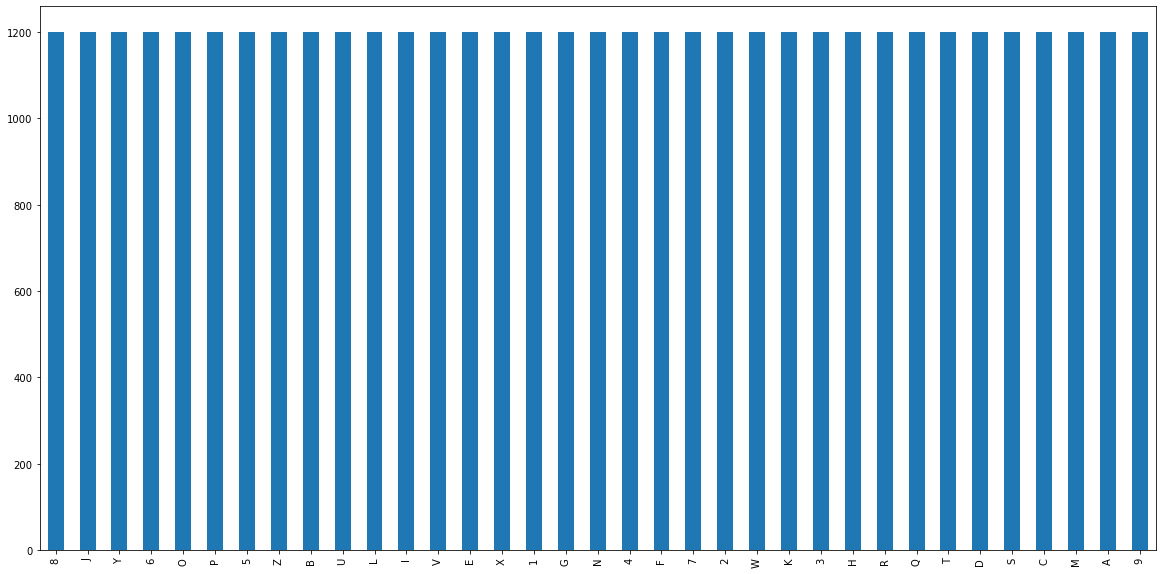

In [67]:
labels_csv["label"].value_counts().plot.bar(figsize=(20, 10))

In [68]:
unique_label = np.unique(labels_csv["label"])

In [69]:
unique_label

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
       'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [70]:
labels = labels_csv["label"].to_numpy()

In [71]:
len(labels), labels

(42000, array(['5', '8', 'I', ..., '3', 'U', 'Y'], dtype=object))

In [72]:
labels[0] == unique_label # w

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [73]:
if len(labels) == len(filename):
  print("No missing data")

No missing data


In [74]:
boolean_labels = [label == unique_label for label in labels]
boolean_labels[42]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False])

In [75]:
len(boolean_labels)

42000

## Creating validation set

In [76]:
X = labels_csv["filename"]

y = boolean_labels

In [77]:
NUM_IMAGES = 2000 #@param {type:"slider", min:1000, max:42000, step:1000}

In [78]:
# Splitting data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(1600, 400, 1600, 400)

## Preprocessing images (turning into tensors)

Creating a preprocessing function

In [80]:
from matplotlib.pyplot import imread

image = imread(filename[42])
image.shape # height, width, color channel

(128, 128, 3)

In [81]:
image.max(), image.min()

(203, 0)

In [82]:
# Image size
IMG_SIZE = 224

# Preprocessing function

def process_image(image_path):
  """
  Takes image file paths and converts in into tensors
  """

  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32) # Convert 0 - 209 values b/w 0 - 1 [NORMALIZATION]
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image 

## Turning our data into batches

Batch size = 32

In [83]:
# Funtion returning (image, label) touple

def get_image_label(image_path, label):
  """
  Takes an image filename and associated label, processes the image and returns a touple of image, label
  """
  image = process_image(image_path)
  return image, label

In [84]:
process_image(X[42]), tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.        , 0.00392157, 0.03921569],
         [0.00280112, 0.01232493, 0.04341737],
         [0.00728291, 0.02577031, 0.05014006],
         ...,
         [0.00392187, 0.04677929, 0.02941222],
         [0.0352943 , 0.10728326, 0.07647087],
         [0.05490196, 0.14509805, 0.10588236]],
 
        [[0.00280112, 0.01092437, 0.04901961],
         [0.00360144, 0.01382553, 0.04821929],
         [0.00488195, 0.01846739, 0.04693878],
         ...,
         [0.00402192, 0.04817985, 0.03081278],
         [0.03619466, 0.10868382, 0.07787143],
         [0.05630253, 0.1464986 , 0.10728292]],
 
        [[0.00728291, 0.02212885, 0.06470589],
         [0.00488195, 0.01622649, 0.05590236],
         [0.00104042, 0.00678271, 0.04181673],
         ...,
         [0.00418199, 0.05042075, 0.03305367],
         [0.03763525, 0.11092472, 0.08011232],
         [0.05854342, 0.1487395 , 0.10952382]],
 
        ...,
 
        [[0.00280133, 0.03445432

In [85]:
X[42], y[42]

('C:\\Users\\ayush\\Desktop\\ISL\\Indian\\T\\1177.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False]))

### Converting data into batches

In [86]:
# Batch size
BATCH_SIZE = 32

# Create a function to convert data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and labels (y) pairs.
  Shuffles the training data, but does not shuffle the validation data.
  Also accepts test data as input (no labels).
  """

  # If the data is the test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches.. ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths and no lables
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is the valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches.. ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)  # Create image, label touples
    return data_batch

  # If the data is the training dataset, we need to shuffle it
  else:
    print("Creating training data batches.. ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffling the pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # This also turns image path into preprocessed image
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [87]:
# Creating training and validation data batches

train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches.. 
Creating validation data batches.. 


In [88]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 35), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 35), dtype=tf.bool, name=None)))

Visualising data batches

In [89]:
def show_25_images(images, labels):
  """
  Display a plot of 25 images
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_label[labels[i].argmax()])
    plt.axis("off")

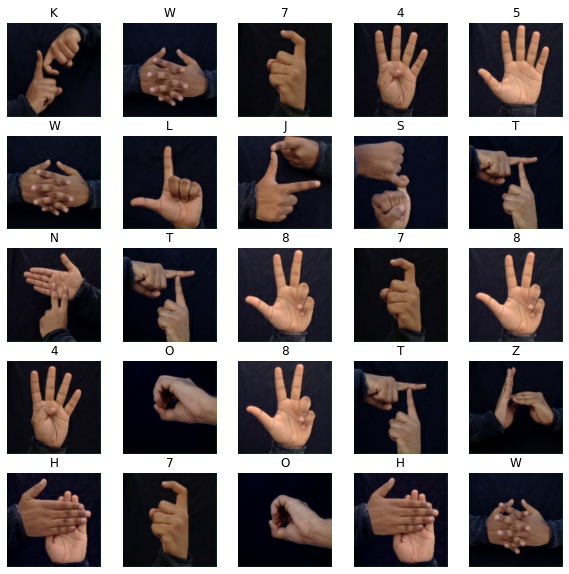

In [90]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

## Building a model

In [91]:
# Setup input shape to the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape to the model

OUTPUT_SHAPE = len(unique_label)

# Setup model URL from TensorFlow Hub

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"

In [92]:
# Function to build keras model

# Create a function that builds Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with: ", model_url)

  # Setup the model layers

  model = tf.keras.Sequential([
    hub.KerasLayer(model_url),                   #Layer 1 - INPUT LAYER
    tf.keras.layers.Dense(units=output_shape,
                          activation="softmax")  #Layer 2 - OUTPUT LAYER
                               
  ])

  # Compile the model

  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(input_shape)

  return model

In [93]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dense (Dense)               (None, 35)                35070     
                                                                 
Total params: 6,193,575
Trainable params: 35,070
Non-trainable params: 6,158,505
_________________________________________________________________


### Tensorboard callback setup

In [94]:
# Loading tensorboard extension
%load_ext tensorboard

In [95]:
import datetime

# Create a function to build a tensorboard callback

def create_tensorboard_callback():
  # Create a log directory for storing tensorboard log
  log_str = r"C:\Users\ayush\Desktop\ISL\logs"
  logdir = os.path.join(log_str,
                        # Make it such that logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

In [96]:
# Create an early stopping callback 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training our model

Trains only over 2000 images

In [97]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}

In [98]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  # Return the fitted model
  return model

In [99]:
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Epoch 1/100
50/50 [==============================] - 62s 1s/step - loss: 1.3488 - accuracy: 0.7225 - val_loss: 0.1406 - val_accuracy: 0.9900
Epoch 2/100
50/50 [==============================] - 56s 1s/step - loss: 0.0758 - accuracy: 0.9956 - val_loss: 0.0526 - val_accuracy: 0.9975
Epoch 3/100
50/50 [==============================] - 55s 1s/step - loss: 0.0370 - accuracy: 0.9969 - val_loss: 0.0335 - val_accuracy: 0.9975
Epoch 4/100
50/50 [==============================] - 57s 1s/step - loss: 0.0235 - accuracy: 0.9994 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 5/100
50/50 [==============================] - 56s 1s/step - loss: 0.0162 - accuracy: 0.9987 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 6/100
50/50 [==============================] - 55s 1s/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 7/100
50/50 [==============================] - 56s 1s/

## Checking tensorboard log

In [101]:
%tensorboard --logdir drive/MyDrive/ISL/logs

## Making and evaluating predictions using trained model

In [102]:
# Make predictions on the validation data (not used to train on)

predictions = model.predict(valid_data, verbose=1)
predictions

13/13 [==============================] - 11s 790ms/step


array([[4.9428501e-05, 4.5623710e-06, 2.5867012e-06, ..., 4.7868471e-05,
        2.8154554e-04, 6.9444330e-05],
       [2.6029742e-05, 1.2068851e-05, 1.4383737e-05, ..., 3.3844556e-06,
        8.1464162e-07, 5.4238717e-06],
       [6.8306032e-04, 1.1676382e-03, 2.3873022e-03, ..., 1.9696474e-05,
        1.0409010e-05, 2.1256059e-05],
       ...,
       [4.9004093e-04, 4.3386386e-05, 4.7014273e-06, ..., 2.7076903e-06,
        5.1391698e-08, 5.6653630e-07],
       [9.0863992e-05, 1.6737638e-05, 5.0440794e-06, ..., 2.2185319e-05,
        8.1840317e-06, 1.5978494e-05],
       [8.9612101e-08, 1.1988868e-06, 5.5074717e-05, ..., 8.0078125e-06,
        1.4390506e-05, 3.3300366e-05]], dtype=float32)

In [103]:
np.sum(predictions[0]) # Softmax funciton

0.99999994

In [104]:
# First prediction

index = 0
print(predictions[index])
print(f"Max value (prediction probability): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_label[np.argmax(predictions[index])]}")

[4.94285014e-05 4.56237103e-06 2.58670116e-06 3.39800681e-05
 1.61202806e-05 1.67588179e-04 7.66845304e-04 6.68418143e-05
 7.36451242e-04 5.67085226e-04 3.73360934e-04 1.89408165e-04
 9.91000235e-01 3.48105590e-04 1.13620896e-04 5.01468021e-04
 6.07953625e-05 3.47038760e-04 5.62459114e-04 1.59086974e-03
 1.40077129e-04 1.72342916e-05 1.75158042e-04 7.83847703e-04
 7.34430942e-05 1.97202171e-04 1.19575969e-04 1.27739113e-04
 3.34077136e-04 3.27289963e-05 3.82529797e-05 6.28887938e-05
 4.78684706e-05 2.81545537e-04 6.94443297e-05]
Max value (prediction probability): 0.991000235080719
Sum: 0.9999999403953552
Max index: 12
Predicted label: D


In [105]:
# Turn prediction probabilities into their respective labels (easier to understand)

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into label
  """

  return unique_label[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities 
pred_label = get_pred_label(predictions[0])

pred_label

'D'

In [106]:
# Create a function to unbatch a batch dataset

def unbatchify(data):
  """
  Takes batched dataset of image, labels Tensors and return seperate arrays of images and labels.
  """
  images_ = []
  labels_ = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_label[np.argmax(label)])

  return images_, labels_

In [107]:
val_images, val_labels = unbatchify(valid_data)

val_images[0], val_labels[0]

(array([[[0.05490196, 0.05490196, 0.09411766],
         [0.05630253, 0.05630253, 0.09551822],
         [0.05854342, 0.05854342, 0.09775911],
         ...,
         [0.02437011, 0.10000046, 0.08263338],
         [0.06246521, 0.1470591 , 0.1162467 ],
         [0.08627451, 0.1764706 , 0.13725491]],
 
        [[0.0535014 , 0.0535014 , 0.0927171 ],
         [0.05490196, 0.05490196, 0.09411766],
         [0.05714286, 0.05714286, 0.09635855],
         ...,
         [0.02567063, 0.10130097, 0.08393389],
         [0.0629654 , 0.1475593 , 0.1167469 ],
         [0.08627451, 0.1764706 , 0.13725491]],
 
        [[0.05126051, 0.05126051, 0.09047619],
         [0.05266107, 0.05266107, 0.09187675],
         [0.05490196, 0.05490196, 0.09411766],
         ...,
         [0.02775145, 0.10338179, 0.08601471],
         [0.06376571, 0.1483596 , 0.11754721],
         [0.08627451, 0.1764706 , 0.13725491]],
 
        ...,
 
        [[0.12184847, 0.18599424, 0.14537787],
         [0.09823925, 0.16238502, 0.12176

In [108]:
def plot_pred(prediction_probabilities, labels, images, n=0):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get pred labels
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on the prediction (true/false)
  if pred_label==true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

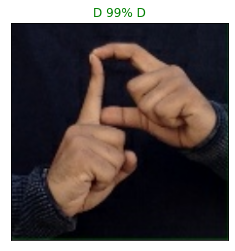

In [109]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images,
          n=0)

In [110]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with the true label for sample n;
  """

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes 
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_label[top_10_pred_indexes]

  # Setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change the color of true labels
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

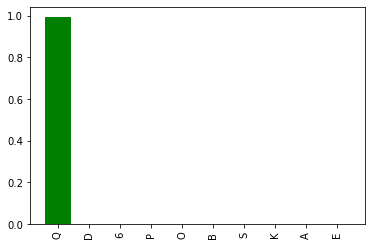

In [111]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

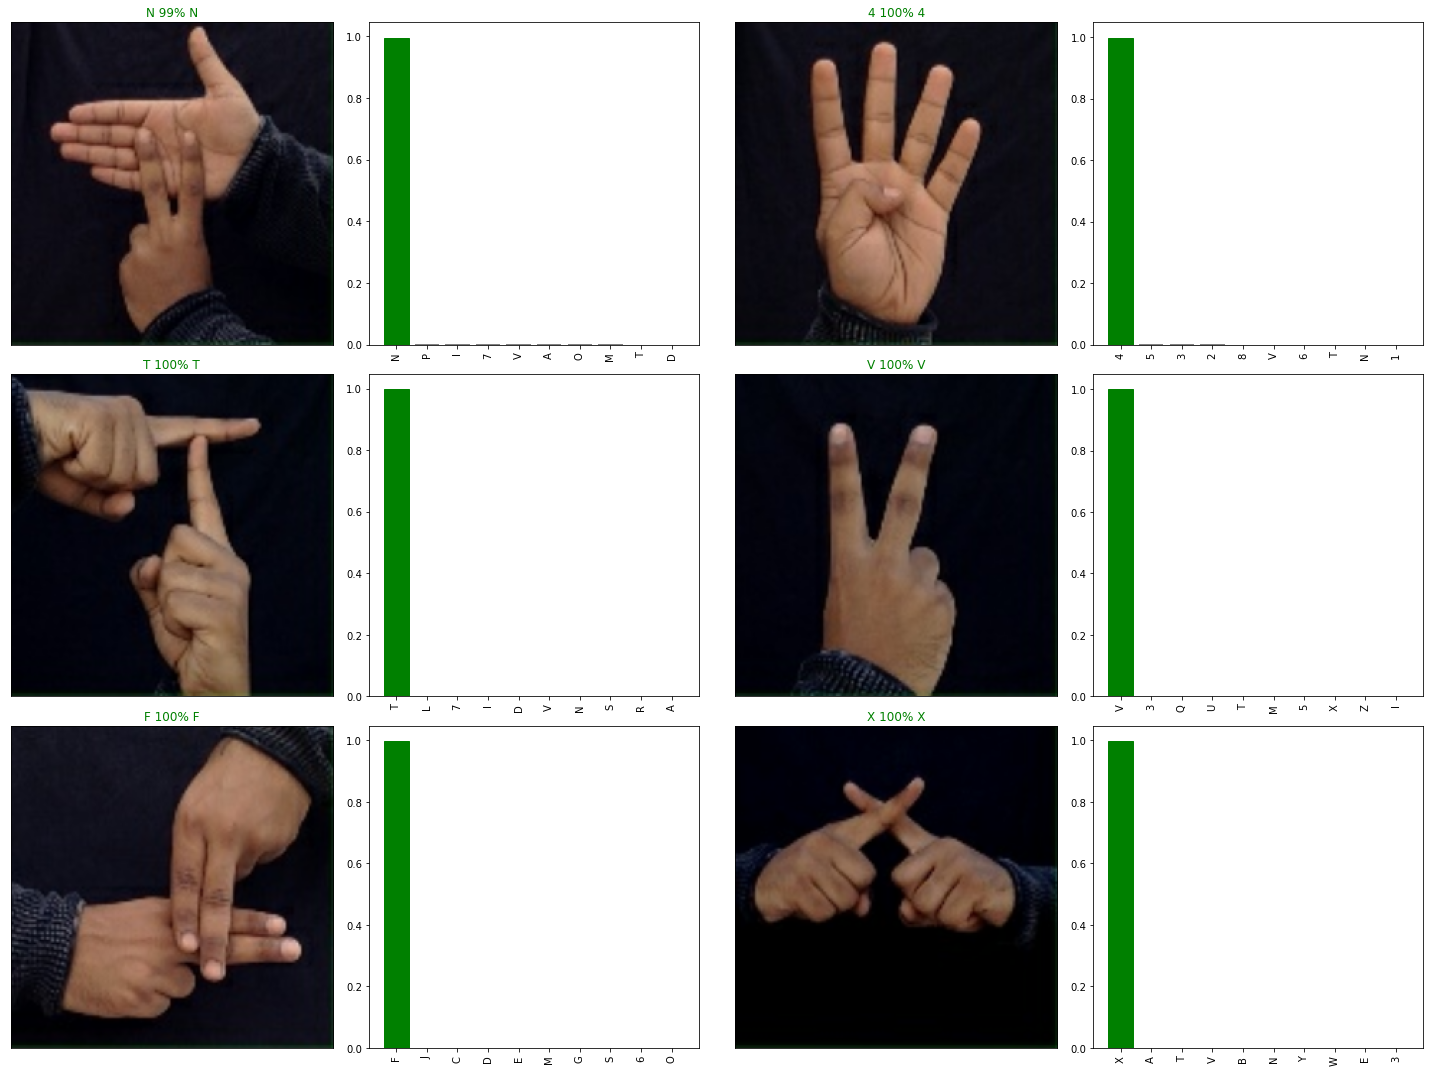

In [112]:
# Let's check out a few predictions and their different values

i_multiplier = 20
num_cols = 2
num_rows = 3
num_images = num_cols*num_rows

plt.figure(figsize = (10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

In [113]:
# Create a function to save a model

def save_model(model, suffix=None):
  """
  Save a given model in model directory and append a suffix (string)
  """

  # Create a model directory pathname with current time
  model_str = r"C:\Users\ayush\Desktop\ISL\model"
  modeldir = os.path.join(model_str, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  model_path = modeldir + "-" + suffix + ".h5" # Save format for model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [114]:
# Create a function to load a trained model

def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading a saved model from {model_path}...")
  model = tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer": hub.KerasLayer})
  
  return model

In [115]:
# Save our model trained on 1000 images

save_model(model, suffix="2000-images-mobilenetv2-140")

Saving model to: C:\Users\ayush\Desktop\ISL\model\20220108-213214-2000-images-mobilenetv2-140.h5...


'C:\\Users\\ayush\\Desktop\\ISL\\model\\20220108-213214-2000-images-mobilenetv2-140.h5'

In [120]:
# Load our trained model

loaded_2000_image_model = load_model(r"C:\\Users\\ayush\\Desktop\\ISL\\model\\20220108-213214-2000-images-mobilenetv2-140.h5")

Loading a saved model from C:\\Users\\ayush\\Desktop\\ISL\\model\\20220108-213214-2000-images-mobilenetv2-140.h5...


In [121]:
model.evaluate(valid_data)

13/13 [==============================] - 11s 794ms/step - loss: 0.0111 - accuracy: 1.0000


[0.011116531677544117, 1.0]

In [122]:
loaded_2000_image_model.evaluate(valid_data)

13/13 [==============================] - 11s 803ms/step - loss: 0.0111 - accuracy: 1.0000


[0.011116531677544117, 1.0]

## Training a model on full data

In [123]:
len(X), len(y)

(42000, 42000)

In [124]:
full_data = create_data_batches(X, y)

full_data

Creating training data batches.. 


<BatchDataset shapes: ((None, 224, 224, 3), (None, 35)), types: (tf.float32, tf.bool)>

In [125]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5


In [126]:
full_model_tensorboard = create_tensorboard_callback()

In [127]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

In [128]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
1313/1313 [==============================] - 1045s 792ms/step - loss: 0.0591 - accuracy: 0.9890
Epoch 2/100
1313/1313 [==============================] - 994s 757ms/step - loss: 6.4003e-04 - accuracy: 1.0000
Epoch 3/100
1313/1313 [==============================] - 996s 759ms/step - loss: 2.2244e-04 - accuracy: 1.0000
Epoch 4/100
1313/1313 [==============================] - 1026s 782ms/step - loss: 9.9856e-05 - accuracy: 1.0000
Epoch 5/100
1313/1313 [==============================] - 1030s 785ms/step - loss: 4.8715e-05 - accuracy: 1.0000


In [129]:
save_model(full_model, suffix="full-images-mobilenetv2-140")

Saving model to: C:\Users\ayush\Desktop\ISL\model\20220108-225938-full-images-mobilenetv2-140.h5...


'C:\\Users\\ayush\\Desktop\\ISL\\model\\20220108-225938-full-images-mobilenetv2-140.h5'

In [132]:
loaded_full_model = load_model(r"C:\\Users\\ayush\\Desktop\\ISL\\model\\20220108-225938-full-images-mobilenetv2-140.h5")

Loading a saved model from C:\\Users\\ayush\\Desktop\\ISL\\model\\20220108-225938-full-images-mobilenetv2-140.h5...


## Checking result on custom images

In [155]:
custom_path = r"C:\\Users\\ayush\\Desktop\\ISL\\custom\\"

In [162]:
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['C:\\\\Users\\\\ayush\\\\Desktop\\\\ISL\\\\custom\\\\7.jpg',
 'C:\\\\Users\\\\ayush\\\\Desktop\\\\ISL\\\\custom\\\\download.jpg',
 'C:\\\\Users\\\\ayush\\\\Desktop\\\\ISL\\\\custom\\\\images.jpg']

In [163]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches.. 


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [164]:
# Make predictions using full model

custom_preds = loaded_full_model.predict(custom_data)
custom_preds.shape

(3, 35)

In [165]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['S', 'S', 'C']

In [166]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

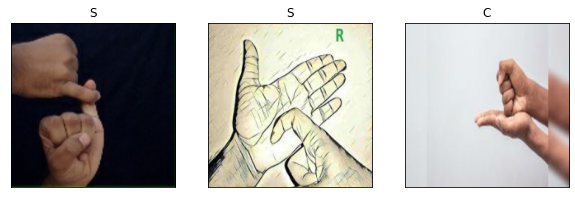

In [168]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)